# NAME - ABHIJEET JAIN
## Data Science and Business Analytics Intern @ The Sparks Foundation

# TSF GRIP TASK - Beginner Level

## #Task2 : Prediction Using Unsupervised ML
### Problem Statement - From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually
### To Predict - optimum number of clusters and represent it visually
### Dataset : Iris.csv (https://bit.ly/3kXTdox)
#### Algorithm used : K-means Clustering
## Import Libraries

In [165]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sklearn.metrics as metrics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [166]:
import warnings
warnings.simplefilter(action = 'ignore' , category = FutureWarning)
warnings.filterwarnings('ignore')

## Load Iris Dataset

In [167]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


###### K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science. In Iris dataset, there are four features.

In [168]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [170]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [171]:
data.shape

(150, 6)

In [172]:
data.drop('Id', axis=1, inplace=True)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Arrange data into Feature Matrix

In [173]:
features = ['PetalLengthCm','PetalWidthCm']
x = data.loc[:, features].values
x

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

## Standardize the Data

In [174]:
x=StandardScaler().fit_transform(x)
x

array([[-1.34127240e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.39813811e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.17067529e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.44444970e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.22754100e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.44444970e+00],
       [-1.51186952e+00, -1.44444970e+00],
       [-1.45500381e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.39813811e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.56873522e+00, -1.31297673e+00],
       [-1.

## Plot data to estimate number of Clusters

Text(0.5, 1.0, 'K-Means Clustering')

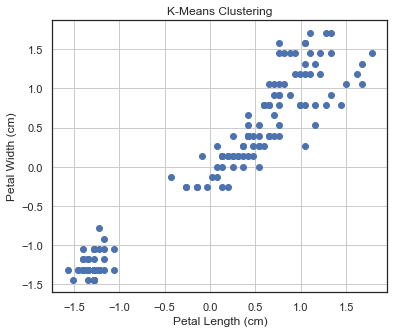

In [175]:
X=pd.DataFrame(x,columns=features)
plt.figure(figsize=(6,5))
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)');
plt.grid()
plt.title('K-Means Clustering')

## Finding the optimum number of clusters for K-means Clustering

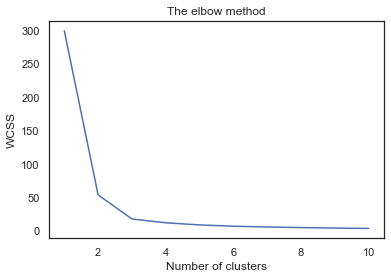

In [176]:
from sklearn.cluster import KMeans
wc = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wc.append(kmeans.inertia_)
    
# Plotting the results onto a line graph
plt.plot(range(1, 11), wc)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

##### It is called "The Elbow Method". The Elbow method is a heuristic method of interpretation and validation of consistency within-cluster analysis designed to help to find the appropriate number of clusters in a dataset.

## K-Means Clustering

In [177]:
# Make an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)

# Fit only on a features matrix
kmeans.fit(x)

KMeans(n_clusters=3, random_state=1)

In [178]:
# Get labels and cluster centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [179]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [180]:
centroids

array([[-1.30487835, -1.25512862],
       [ 1.02813193,  1.12749028],
       [ 0.30564587,  0.16609419]])

## Visually Evaluate the Clusters

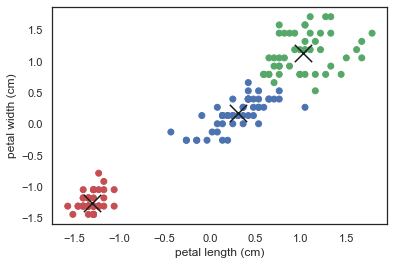

In [181]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');

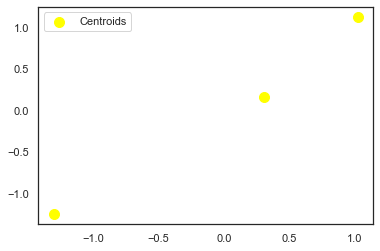

In [182]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## Visually Evaluate the clusters and compare the species

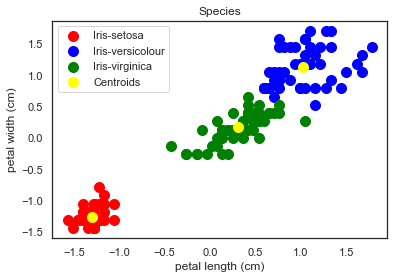

In [183]:
# Visualising the clusters 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Species')
plt.legend()

##### They look pretty similar. Looks like KMeans picked up flower differences with only two features and not the labels.